**DATA COLLECTION**

In [1]:
import pandas as pd

data = pd.read_csv('Mall_Customers.csv')
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


**DATA EXPLORATION**

In [2]:
# Check for missing values
print(data.isnull().sum())

# Get basic statistics of numerical columns
print(data.describe())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


**DATA PREPROCESSING**

In [3]:
# No preprocessing needed for this dataset as there are no missing values or categorical variables

# Select features for clustering
X = data.iloc[:, [3, 4]]  


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\Users\palak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\palak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\palak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\palak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

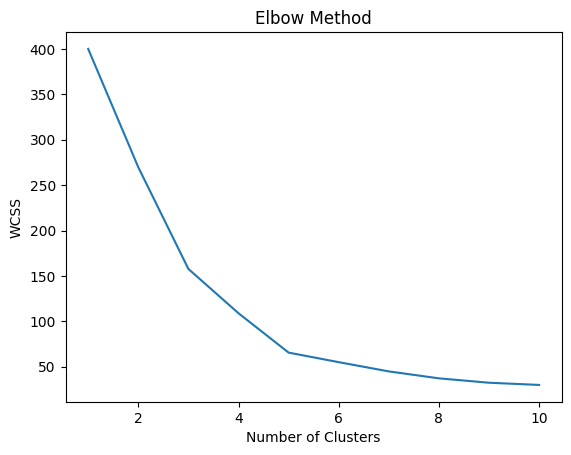

In [7]:
import matplotlib.pyplot as plt  # Importing the matplotlib module

wcss = []  

from sklearn.cluster import KMeans

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [8]:
# From the elbow method, let's choose 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original DataFrame
data['Cluster'] = kmeans.labels_


C:\Users\palak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


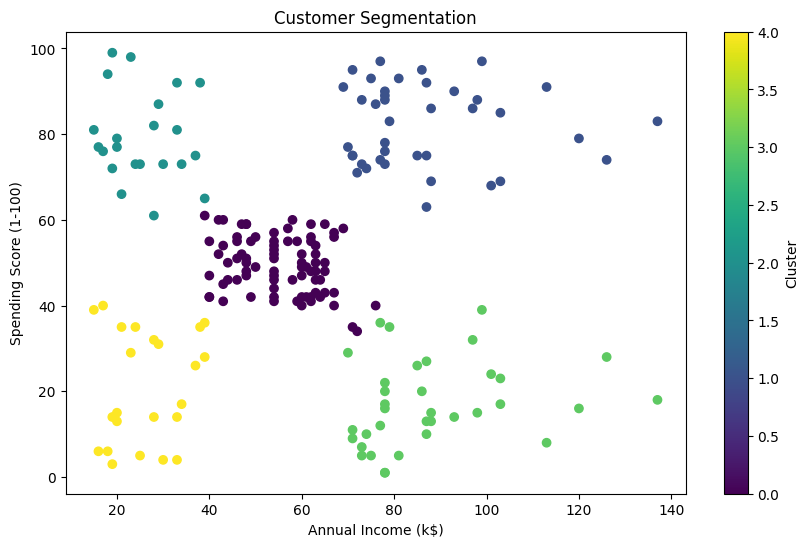

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, c='Cluster', cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()


In [10]:
# Exclude non-numeric columns from the groupby operation
numeric_data = data.select_dtypes(include='number')

# Group by 'Cluster' and calculate the mean
cluster_means = numeric_data.groupby('Cluster').mean()

# Print the resulting means
print(cluster_means)


         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         86.320988  42.716049           55.296296               49.518519
1        162.000000  32.692308           86.538462               82.128205
2         23.090909  25.272727           25.727273               79.363636
3        164.371429  41.114286           88.200000               17.114286
4         23.000000  45.217391           26.304348               20.913043


In [15]:
from sklearn.metrics import silhouette_score

silhouette_score_value = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette Score:", silhouette_score_value)


Silhouette Score: 0.5546571631111091


In [16]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    silhouette_score_value = silhouette_score(X_scaled, kmeans.labels_)
    print("For k =", k, ", Silhouette Score:", silhouette_score_value)


C:\Users\palak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\palak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\palak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\palak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

For k = 2 , Silhouette Score: 0.3212707813918878
For k = 3 , Silhouette Score: 0.46658474419000145
For k = 4 , Silhouette Score: 0.4939069237513199
For k = 5 , Silhouette Score: 0.5546571631111091
For k = 6 , Silhouette Score: 0.5398800926790663
For k = 7 , Silhouette Score: 0.5281492781108291
For k = 8 , Silhouette Score: 0.4552147906587443
For k = 9 , Silhouette Score: 0.4570853966942764
For k = 10 , Silhouette Score: 0.4431713026508046


C:\Users\palak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\palak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [21]:
# Example: Add a new feature 'Total_Spending' as the sum of 'Annual Income' and 'Spending Score'
data['Total_Spending'] = data['Annual Income (k$)'] + data['Spending Score (1-100)']
X = data[['Annual Income (k$)', 'Spending Score (1-100)', 'Total_Spending']]
X_scaled = scaler.fit_transform(X)


In [22]:
# Perform clustering with the updated feature set
kmeans_new = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_new.fit(X_scaled)


C:\Users\palak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

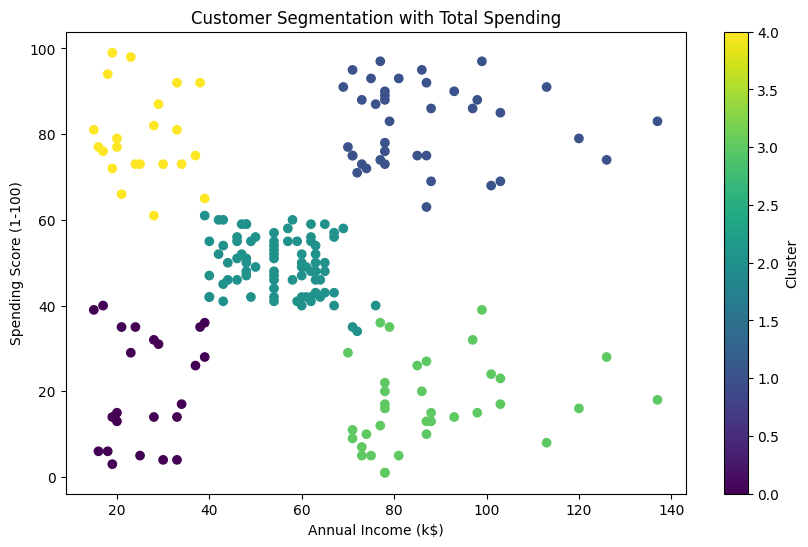

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', c=kmeans_new.labels_, cmap='viridis', data=data)
plt.title('Customer Segmentation with Total Spending')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()


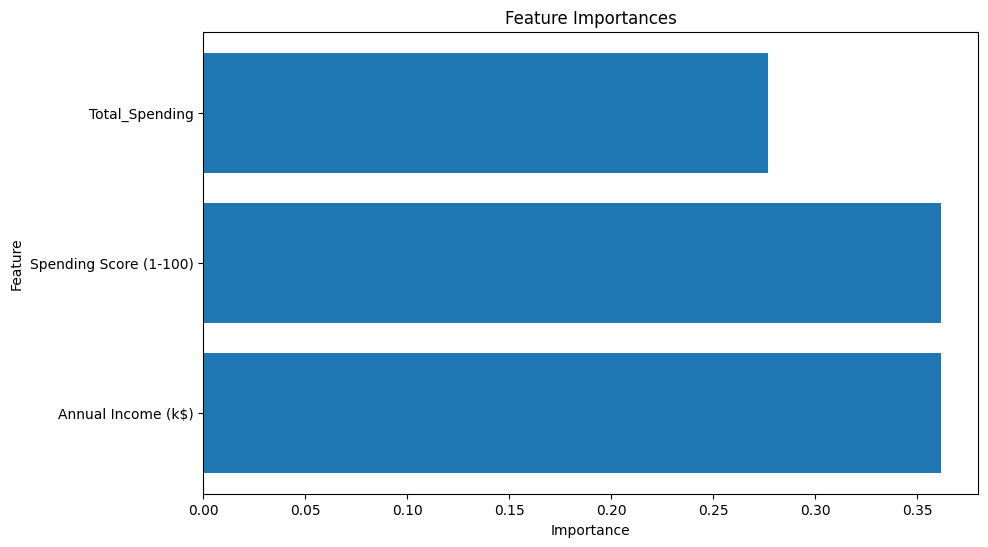

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Example: Fit a RandomForestClassifier to predict cluster membership
clf = RandomForestClassifier(random_state=42)
clf.fit(X_scaled, kmeans_new.labels_)


# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(y=X.columns, width=clf.feature_importances_)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



Inertia (WCSS): 29.981897788243693
Silhouette Score: 0.43511178870577916


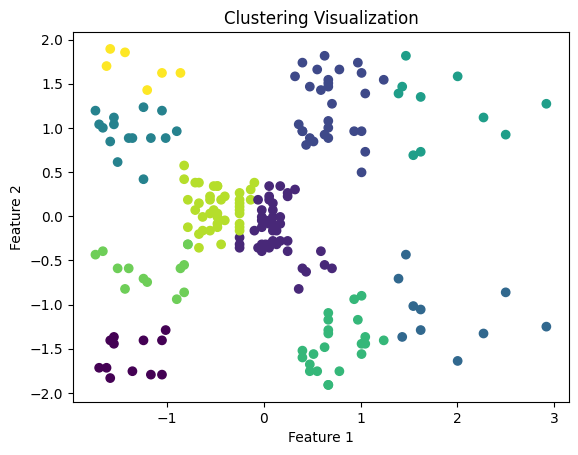

In [26]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score

# 1. Calculate Inertia (WCSS)
inertia = kmeans.inertia_
print("Inertia (WCSS):", inertia)

# 2. Calculate Silhouette Score
silhouette = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette Score:", silhouette)

# 3. Visual Inspection
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Clustering Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()